In [1]:
import scipy.io
from scipy import signal
from scipy import stats
import numpy as np
import pandas as pd
from hurst import compute_Hc
import random
import os
import time

import matplotlib.pyplot as plt
import seaborn as sn

# import keras
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


In [2]:
# Importation données (80 features)

# Data importation : ECG&EEG extraction 
# Doubt about ECG, Resp1 & Resp2 data, are they really that ?


Files = [r'SOP01',
         r'SOP02',
         r'SOP03',
         r'SOP04',
         r'SOP05',
         r'SOP06',
         r'SOP07',
         r'SOP08',
         r'SOP09',
         r'SOP10',
         r'SOP11',
         r'SOP12',
         r'SOP13',
         r'SOP14',
         r'SOP15',
         r'SOP16',
         r'SOP17',
         r'SOP18',
         r'SOP19',
         r'SOP20']

Files_QoE = ['SOP1',
             'SOP2',
             'SOP3',
             'SOP4',
             'SOP5',
             'SOP6',
             'SOP7',
             'SOP8',
             'SOP9',
             'SOP10',
             'SOP11',
             'SOP12',
             'SOP13',
             'SOP14',
             'SOP15',
             'SOP16',
             'SOP17',
             'SOP18',
             'SOP19',
             'SOP20']

In [3]:
def data_extraction(Files, Files_QoE):
    
    start_time = time.time()
    data_EEG = []
    ses = ['A','B','C']
    
    print("--- Extracting data ---")
    
    for k in Files: # nombre de sujets 
        data_EEG_sujet = []
        for i in range(3): # nombre de sessions
            data_EEG_session = []
            for j in range(9): # nombre de videos
                print("--- Loading ", k+'_'+ses[i]+'_'+str(j+1), " ---")
                path_data = r'/o'[0]+k+'_'+ses[i]+'_'+str(j+1)+'.csv'
                data_temp = pd.read_csv(r'../data_EEG/3seconds' + path_data)

#                 data_EEG_temp = []
                print('Verif EEG:', data_temp.shape)
                data_EEG_video = []
                for x1 in range(len(data_temp)):
                    ligne = data_temp.iloc[x1]
                    ligne_mod = []
                    for x2 in data_temp.columns[1:]:
                        ligne_mod += [ligne[x2]]
                    data_EEG_video += [ligne_mod]
                print("--- Loaded ---")
                data_EEG_session += [data_EEG_video]
            data_EEG_sujet += [data_EEG_session]
        data_EEG += [data_EEG_sujet]
    print("Should be 20 :",len(data_EEG))
    print("Should be 3 :",len(data_EEG[0]))
    print("Should be 9 :",len(data_EEG[0][0]))
    print("Should be 40 :", len(data_EEG[0][0][0]))
    print("Should be 80 :", len(data_EEG[0][0][0][0]))

#     print(len(data_impedance))
#     print(len(data_impedance[0]))
    
    print("--- Loading QoE ---")
    
    QoE = []
    for k in Files_QoE:
        data_QoE = pd.read_excel(r'../SubjectiveRatings/SubjectiveRatings.xlsx',sheet_name=k)
        # Colonnes : 'SOP' = Q1 ; # = Q2 ; 'Unnamed: 4' = Q3 ; 'Unnamed: 5' = Q4 ; 'Unnamed: 6' = Q5 
        answers = []
        answers_SA = []
        answers_SB = []
        answers_SC = []
        for i in range(9):
            answers_SA += [[data_QoE['SOP'][5+i],data_QoE[data_QoE.columns[3]][5+i],data_QoE['Unnamed: 4'][5+i],data_QoE['Unnamed: 5'][5+i],data_QoE['Unnamed: 6'][5+i]]]

        for i in range(9):
            answers_SB += [[data_QoE['SOP'][14+i],data_QoE[data_QoE.columns[3]][14+i],data_QoE['Unnamed: 4'][14+i],data_QoE['Unnamed: 5'][14+i],data_QoE['Unnamed: 6'][14+i]]]

        for i in range(9):
            answers_SC += [[data_QoE['SOP'][23+i],data_QoE[data_QoE.columns[3]][23+i],data_QoE['Unnamed: 4'][23+i],data_QoE['Unnamed: 5'][23+i],data_QoE['Unnamed: 6'][23+i]]]

        QoE += [[answers_SA,answers_SB,answers_SC]]
    # print(data_QoE.shape)

    print(len(QoE))
    print(len(QoE[0]))
    print(len(QoE[0][0]))
    print(len(QoE[0][0][0]))
    print("Loading done in %s s" %(time.time()-start_time))
    
    return (data_EEG, QoE)

EEG_features,QoE = data_extraction(Files,Files_QoE)

--- Extracting data ---
--- Loading  SOP01_A_1  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_2  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_3  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_4  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_5  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_6  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_7  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_8  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_A_9  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_B_1  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_B_2  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_B_3  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_B_4  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_B_5  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_B_6  ---
Verif EEG: (40, 81)
--- Loaded ---
--- Loading  SOP01_B_7  ---
Ver

In [4]:
# format data : [sujets,session,video,frames,features]
# format features : [delta,theta,alpha,beta,gamma]
                      
def Ratio_calculation(ESD):
    ratios = []
    for k in range(len(ESD)): # par sujet
        subject = []
        for i in range(len(ESD[0])): # par session
            session = []
            for j in range(len(ESD[0][0])): # par video
                video = []
                for x1 in range(len(ESD[0][0][0])): # par frame
                    frame = []
                    for x2 in range(int(len(ESD[0][0][0][0])/10)): # par electrode
                        Delta = ESD[k][i][j][x1][x2*10]
                        Theta = ESD[k][i][j][x1][(x2*10)+1]
                        Alpha = ESD[k][i][j][x1][(x2*10)+2]
                        Beta = ESD[k][i][j][x1][(x2*10)+3]
                        Gamma = ESD[k][i][j][x1][(x2*10)+4]

                        ratio_DT = Delta/Theta
                        ratio_DA = Delta/Alpha
                        ratio_DB = Delta/Beta
                        ratio_DG = Delta/Gamma

                        ratio_TD = Theta/Delta
                        ratio_TA = Theta/Alpha
                        ratio_TB = Theta/Beta
                        ratio_TG = Theta/Gamma

                        ratio_AD = Alpha/Delta
                        ratio_AT = Alpha/Theta
                        ratio_AB = Alpha/Beta
                        ratio_AG = Alpha/Gamma

                        ratio_BD = Beta/Delta
                        ratio_BT = Beta/Theta
                        ratio_BA = Beta/Alpha
                        ratio_BG = Beta/Gamma

                        ratio_GD = Gamma/Delta
                        ratio_GT = Gamma/Theta
                        ratio_GA = Gamma/Alpha
                        ratio_GB = Gamma/Beta

                        frame += [ratio_DT,ratio_DA,ratio_DB,ratio_DG,
                                ratio_TD,ratio_TA,ratio_TB,ratio_TG,
                                ratio_AD,ratio_AT,ratio_AB,ratio_AG,
                                ratio_BD,ratio_BT,ratio_BA,ratio_BG,
                                ratio_GD,ratio_GT,ratio_GA,ratio_GB]
                    video += [frame]
                session += [video]
            subject += [session]
        ratios += [subject] 
                      
    print("Should be 20 :",len(ratios))
    print("Should be 3 :",len(ratios[0]))
    print("Should be 9 :",len(ratios[0][0]))
    print("Should be 40 :", len(ratios[0][0][0]))
    print("Should be 5120 :", len(ratios[0][0][0][0]))
                      
    return ratios
                      
# Ratio_features = Ratio_calculation(EEG_features)

In [5]:
# Fusion data

def MiseFormatEEG(EEG):
    data_all = []
    for k in range(len(EEG)):
        data_sujet = []
        for i in range(len(EEG[0])):
            data_session = []
            for j in range(len(EEG[0][0])):
                data_video = []
                for l in range(len(EEG[0][0][0])):
                    data_video += [EEG[k][i][j][l]]
                data_session += [data_video]
            data_sujet += [data_session]
        data_all += [data_sujet]

    print("Should be 20 : ",len(data_all)) # Sujet
    print("Should be 3 : ",len(data_all[0])) # Session
    print("Should be 9 : ",len(data_all[0][0])) # Videos
    print("Should be 40 : ",len(data_all[0][0][0])) # lignes EEG
    print("Should be 1280 : ",len(data_all[0][0][0][0])) # colonnes EEG
    
    return data_all

data_all = MiseFormatEEG(EEG_features)

Should be 20 :  20
Should be 3 :  3
Should be 9 :  9
Should be 40 :  40
Should be 1280 :  80


In [6]:
#################

data = []
for k in range(len(data_all)):
    for i in range(len(data_all[0])):
        for j in range(len(data_all[0][0])):
            data += [data_all[k][i][j]]

print("Longueur (540):", len(data))
print("Lignes single data point (40)", len(data[0]))
print("Colonnes single data point (1280)", len(data[0][0]))

# 3-class classification
y = []
compt1 = 0
compt2 = 0
compt3 = 0
# print("TEST :", len(QoE)*len(QoE[0])*len(QoE[0][0]))
y = []
y2 = []
y3 = []
y4 = []
y5 = []
for k in range(len(QoE)):
    for i in range(len(QoE[0])):
        for j in range(len(QoE[0][0])):
            if (QoE[k][i][j][0] <= 3):
                y += [0] #[[1,0,0]]
                compt1 += 1
            elif (QoE[k][i][j][0] <= 6):
                y += [1] #[[0,1,0]]
                compt2 += 1
            else:
                y += [2] #[[0,0,1]]
                compt3 += 1
                
            if (QoE[k][i][j][1] <= 3):
                y2 += [0] #[[1,0,0]]
                compt1 += 1
            elif (QoE[k][i][j][1] <= 6):
                y2 += [1] #[[0,1,0]]
                compt2 += 1
            else:
                y2 += [2] #[[0,0,1]]
                compt3 += 1
            
            if (QoE[k][i][j][2] <= 3):
                y3 += [0] #[[1,0,0]]
                compt1 += 1
            elif (QoE[k][i][j][2] <= 6):
                y3 += [1] #[[0,1,0]]
                compt2 += 1
            else:
                y3 += [2] #[[0,0,1]]
                compt3 += 1
                
            if (QoE[k][i][j][3] <= 3):
                y4 += [0] #[[1,0,0]]
                compt1 += 1
            elif (QoE[k][i][j][3] <= 6):
                y4 += [1] #[[0,1,0]]
                compt2 += 1
            else:
                y4 += [2] #[[0,0,1]]
                compt3 += 1
                
            if (QoE[k][i][j][4] <= 3):
                y5 += [0] #[[1,0,0]]
                compt1 += 1
            elif (QoE[k][i][j][4] <= 6):
                y5 += [1] #[[0,1,0]]
                compt2 += 1
            else:
                y5 += [2] #[[0,0,1]]
                compt3 += 1
            
# print("Equilibre classes :",compt1,compt2,compt3)              
print("Longueur Labels :", len(y))

Longueur (540): 540
Lignes single data point (40) 40
Colonnes single data point (1280) 80
Longueur Labels : 540


In [7]:
# print("Vérification nans")
# compt = 0
# for k in range(len(data)):
#     print("Exemple n°",k+1)
#     for i in range(len(data[0])):
#         for j in range(len(data[0][0])):
#             if (np.isfinite(data[k][i][j])==False) or (np.isnan(data[k][i][j])==True):
#                 data[k][i][j] = 0
#                 compt += 1
# print('Compt :', compt)

# # retirer 110 Labels class [0,0,1]=2 : Equilibrage par épurage de la classe dominante

# N_data = []
# N_Y = []

# compt = 0
# for k in range(len(y)):
#     if (y[k]==2) and (compt<100):
#         compt += 1
#         #print(compt)
#     else:
#         N_data += [data[k]]
#         N_Y += [y[k]]

# print("Longueur finale data:", len(N_data))
# print("Longueur nQoE :", len(N_Y))
#print("Nouvel équilibre :", )

In [8]:
# Transformer => MLP model
import tensorflow as tf
import shap

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout, 
    )(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)
    res = x + inputs

#     # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [9]:
def build_model(input_shape,head_size,num_heads,ff_dim,num_transformer_blocks,mlp_units,L2reg,dropout=0,mlp_dropout=0):
    
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    for size in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size[size], num_heads, ff_dim, dropout)

    x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(L2reg))(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(3, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

In [10]:
# dropout = [0.2,0.6]
# # mlp_units = [64,128]
# head = [64,128,256]
# num_head = [1,2,4]
# num_block = [1,2,4]
# reg = [0.2,0.4]

# trial = 0
# max_acc = 0
# for hd_size in head:
#     for nb_head in num_head:
#         for bck in num_block:
#             for regu in reg:
#                 for drp in dropout:
                    
#                     print("Trial n°%s" %trial)
                    
#                     x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)#, random_state=42)
#                     X_train = np.array(x_train)#.astype('float32')
#                     X_test = np.array(x_test)#.astype('float32')
#                     Y_train = np.array(y_train)
#                     Y_test = np.array(y_test)

#                     input_shape = X_train.shape[1:]

#                     model = build_model(
#                         input_shape,
#                         head_size=hd_size,
#                         num_heads=nb_head,
#                         ff_dim=8,
#                         num_transformer_blocks=bck,
#                         mlp_units=[128],
#                         mlp_dropout=0.3,
#                         dropout=0.1,
#                         L2reg=regu
#                     )

#                     model.compile(
#                         loss="sparse_categorical_crossentropy",
#                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#                         metrics=["sparse_categorical_accuracy"],
#                     )

# #                     model.summary()

#                     start_time = time.time()
#                     epoch = 100
#                     # batch_size = 128
#                     history_val = []
#                     history_test = []
#                     for k in range(epoch):
#                         print("----- Epoch n°%s/100 -----" %(k+1))

#                         skf = StratifiedKFold(n_splits=4, shuffle=True)

#                         flag = 1
#                         for index, (train_indices, val_indices) in enumerate(skf.split(X_train, Y_train)):
#                             print("Training on fold " + str(index+1) + "/4...")

#                             xfold = X_train[train_indices]
#                             xval_fold = X_train[val_indices]
#                             yfold = Y_train[train_indices]
#                             yval_fold = Y_train[val_indices]

#                             # K-fold train
#                             history = model.train_on_batch(xfold,yfold)
# #                             history = model.train_on_batch(batch_x,batch_y)
#                             accuracy = history[1]
#                             loss = history[0]
# #                             print("Training acc: " + str(accuracy) + ", loss: " + str(loss))

#                             # K-fold validation
# #                             values = model.evaluate(xval_fold,yval_fold)
#                             values = model.test_on_batch(xval_fold,yval_fold)
#                             if flag:
#                                 history_val += [values]
#                                 flag = 0
#                             accuracy_val = values[1]
#                             loss_val = values[0]
#                             print("Val acc: " + str(accuracy_val) + ", loss: " + str(loss_val))

#                         # Testing
# #                         history_test += [model.evaluate(X_test,Y_tst)]
#                         history_test += [model.test_on_batch(X_test,Y_test)]
#                         accuracy_test = history_test[-1][1]
#                         loss_test = history_test[-1][0]
#                         print("Testing acc: " + str(accuracy_test) + ", loss: " + str(loss_test))

#                     print("Training done in %s s" %(time.time()-start_time))
                    
#                     y_pred = model.predict(X_test, verbose=1)
#                     y_pred = np.argmax(y_pred, axis=1)
#                     acc = accuracy_score(Y_test,y_pred)
                    
#                     y_pred = model.predict(X_test, verbose=1)
#                     y_pred = np.argmax(y_pred, axis=1)
#                     # output_test = np.argmax(Y_test, axis=1)
#                     print(classification_report(Y_test, y_pred))


#                     cm = confusion_matrix(Y_test, y_pred,normalize='true')
#                     df_cm = pd.DataFrame(cm, range(3), range(3))
#                     # plt.figure(figsize=(10,7))
#                     sn.set(font_scale=1.1)  # for label size
#                     sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})  # font size
#                     plt.xlabel("Predictions")
#                     plt.ylabel("True labels")
#                     plt.show()

#                     if acc > max_acc:
#                         max_acc = acc

#                         best_head = hd_size
#                         best_nb_head = nb_head
#                         best_dropout = drp
#                         best_nb_block = bck
#                         best_reg = regu
                        
#                         which = trial
                        
# #                         model.save("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/Transformer.h5")
# #                         model.save_weights("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/TransformerWeights.h5")
        
#                     x = [x+1 for x in range(epoch)]

#                     loss = []
#                     acc = []
#                     val_loss = []
#                     val_acc = []
#                     for k in range(len(history_val)):
#                         loss += [history_val[k][0]]
#                         acc += [history_val[k][1]]
#                         val_loss += [history_test[k][0]]
#                         val_acc += [history_test[k][1]]

#                     plt.plot(x,loss,color='orange') #"loss"
#                     plt.plot(x,acc,color='blue') #"acc"
#                     plt.plot(x,val_loss,color='red') #"val_loss"
#                     plt.plot(x,val_acc,color='green') #"val_acc"
#                     plt.ylim(0,1)
#                     plt.show()
                    
#                     trial += 1
        
# # callbacks = [tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)]

# # history = model.fit(
# #     X_train,
# #     Y_train,
# #     validation_data=(X_test,Y_test),
# #     epochs=300,
# #     batch_size=32,
# #     callbacks=callbacks,
# # )

# print("Best head_size :", best_head)
# print("Best number of heads :", best_nb_head)
# print("Best dropout :", best_dropout)
# print("Best nb_block :", best_nb_block)
# print("Best regulation :", best_reg)

# print("Best accuracy :", max_acc)
# print("Achieved at trial %s" %which)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, y2, test_size=0.2, random_state=8)
X_train = np.array(x_train)#.astype('float32')
X_test = np.array(x_test)#.astype('float32')
Y_train = np.array(y_train)
Y_test = np.array(y_test)

input_shape = X_train.shape[1:]

model = build_model(
                    input_shape,
                    head_size=[512,256,128], #128
                    num_heads=2, #2
                    ff_dim=16, #8
                    num_transformer_blocks=3, #2
                    mlp_units=[1024,512,128],
                    mlp_dropout=0.3, #0.3
                    dropout=0.0, #0.3
                    L2reg=0.0)

model.compile(loss="sparse_categorical_crossentropy",
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            metrics=["sparse_categorical_accuracy"],
)

# Training

start_time = time.time()

In [12]:
# epoch = 150
# batch_size = 128
# history_val = []
# history_test = []
# for k in range(epoch):
#     print("----- Epoch n°%s/150 -----" %(k+1))
    
#     skf = StratifiedKFold(n_splits=4, shuffle=True)
    
#     flag = 1
#     for index, (train_indices, val_indices) in enumerate(skf.split(X_train, Y_train)):
#         print("Training on fold " + str(index+1) + "/4...")

#         xfold = X_train[train_indices]
#         xval_fold = X_train[val_indices]
#         yfold = Y_train[train_indices]
#         yval_fold = Y_train[val_indices]
        
# #         for batch in range(int(len(xfold)/batch_size)+1):

# #             # Batch cutting
# #             batch_x = xfold[batch:(batch+batch_size)]
# #             batch_y = yfold[batch:(batch+batch_size)]

#         # K-fold train
# #              history = model.fit(xfold,yfold)
#         history = model.train_on_batch(xfold,yfold)
# #             history = model.train_on_batch(batch_x,batch_y)
# #              print(model.metrics_names)
#         accuracy = history[1]
#         loss = history[0]
# #             print("Training acc: " + str(accuracy) + ", loss: " + str(loss))

#         # K-fold validation
# #         values = model.evaluate(xval_fold,yval_fold)
#         values = model.test_on_batch(xval_fold,yval_fold)
#         if flag:
#             history_val += [values]
#             flag = 0
#         accuracy_val = values[1]
#         loss_val = values[0]
#         print("Val acc: " + str(accuracy_val) + ", loss: " + str(loss_val))

#     # Testing
# #     history_test += [model.evaluate(X_test,Y_tst)]
#     history_test += [model.test_on_batch(X_test,Y_test)]
#     accuracy_test = history_test[-1][1]
#     loss_test = history_test[-1][0]
#     print("Testing acc: " + str(accuracy_test) + ", loss: " + str(loss_test))


In [13]:
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test,Y_test),
    epochs=400,
    batch_size=128
)

print("Training done in %s s" %(time.time()-start_time))

# model.save("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/Transformer.h5")
# model.save_weights("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/TransformerWeights.h5")

# print(model.metrics_names)
# model.evaluate(X_test, Y_test, verbose=1)

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
# output_test = np.argmax(Y_test, axis=1)
print(classification_report(Y_test, y_pred))

Epoch 1/400
4/4 [==============================] - 11s 734ms/step - loss: 188.8982 - sparse_categorical_accuracy: 0.5185 - val_loss: 52.9881 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/400
4/4 [==============================] - 2s 464ms/step - loss: 143.6030 - sparse_categorical_accuracy: 0.3843 - val_loss: 131.3934 - val_sparse_categorical_accuracy: 0.2222
Epoch 3/400
4/4 [==============================] - 2s 467ms/step - loss: 122.9110 - sparse_categorical_accuracy: 0.3333 - val_loss: 127.0931 - val_sparse_categorical_accuracy: 0.2222
Epoch 4/400
4/4 [==============================] - 2s 458ms/step - loss: 103.6664 - sparse_categorical_accuracy: 0.3958 - val_loss: 42.8855 - val_sparse_categorical_accuracy: 0.2222
Epoch 5/400
4/4 [==============================] - 2s 472ms/step - loss: 94.1194 - sparse_categorical_accuracy: 0.5116 - val_loss: 30.0094 - val_sparse_categorical_accuracy: 0.5556
Epoch 6/400
4/4 [==============================] - 2s 507ms/step - loss: 89.8851 - spars

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


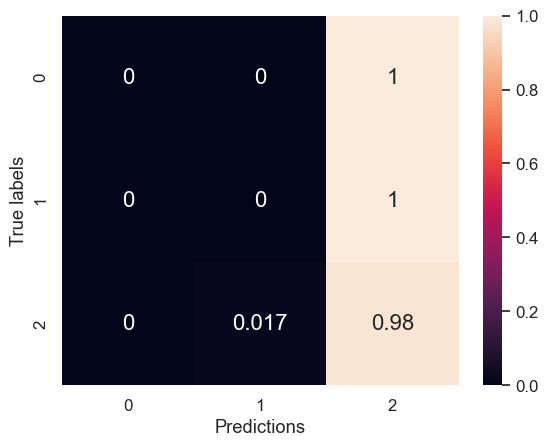

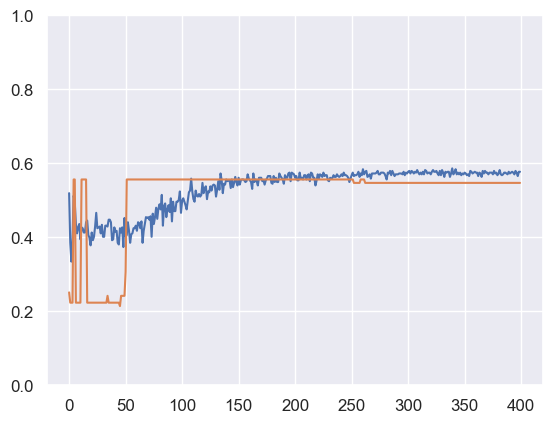

In [14]:

cm = confusion_matrix(Y_test, y_pred,normalize='true')
df_cm = pd.DataFrame(cm, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.1)  # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})  # font size
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.show()

# x = [x+1 for x in range(epoch)]

# loss = []
# acc = []
# val_loss = []
# val_acc = []
# for k in range(len(history_val)):
#     loss += [history_val[k][0]]
#     acc += [history_val[k][1]]
#     val_loss += [history_test[k][0]]
#     val_acc += [history_test[k][1]]
    
# plt.plot(x,loss,color='orange') #"loss"
# plt.plot(x,acc,color='blue') #"acc"
# plt.plot(x,val_loss,color='red') #"val_loss"
# plt.plot(x,val_acc,color='green') #"val_acc"
# plt.ylim(0,1)
# plt.show()

plt.figure()
# plt.plot(history.history['sparse_categorical_crossentropy'])
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.ylim(0,1)
plt.show()

In [15]:
###### BiLSTM

#### Data in shape (a list with feature table after another)
import tensorflow as tf
from sklearn.metrics import accuracy_score
# import keras_nlp

# # Hide GPU from visible devices
# tf.config.set_visible_devices([], 'GPU')

# To find out which devices your operations and tensors are assigned to
# tf.debugging.set_log_device_placement(False)

# shape_data = (len(X_train[0]),len(X_train[0][0]))#(40,40)

####

# tf.compat.v1.disable_v2_behavior()
# gpus = tf.config.experimental.list_physical_devices('GPU')
# print(gpus)
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

# x_train, x_test, y_train, y_test = train_test_split(augmented_data, augmented_labels, test_size=0.2, random_state=42)
# X_train = np.array(ok_data).astype('float32')
# X_test = np.array(X_test).astype('float32')
# Y_train = np.array(augmented_labels).astype('int')
# Y_test = np.array(y_test).astype('int')

# For BiLSTM 
# x_train = X_train.reshape(232,shape_data[0], shape_data[1])

# x_test = X_test.reshape(100,shape_data[0], shape_data[1])

# For Transformer
# x_train = X_train.reshape(225,shape_data[0], shape_data[1])

# x_test = X_test.reshape(97,shape_data[0], shape_data[1])



### ConvLSTM_v1 model
# Remplacer LSTM => Transformers

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=150, restore_best_weight=True)

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.ConvLSTM2D(filters=64, kernel_size=(2,2), activation='relu', padding = "same",  input_shape=(1, 1, shape_data[0], shape_data[1])))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding = "same"))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(3, activation='softmax'))

# model.compile(loss='mean_squared_error',
#               optimizer='nadam',
#               metrics=['accuracy'])

# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=600, callbacks=[callback], verbose=1)

# history = model.train_on_batch(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100, callbacks=[callback], verbose=1)



In [16]:
# BiLSTM model
units_layer1 = [64,128]
units_layer2 = [64,128]
drop = [0.55,0.75]
# mlp_drop = [0.3,0.5]
reg = [0.55,0.65]

rdm = 0
x_train, x_test, y_train, y_test = train_test_split(data, y2, test_size=0.3, random_state=rdm)
while (len(np.unique(y_test)) != 3):
    rdm += 1
    x_train, x_test, y_train, y_test = train_test_split(data, y2, test_size=0.3, random_state=rdm)
X_train = np.array(x_train)#.astype('float32')
X_test = np.array(x_test)#.astype('float32')
Y_train = np.array(y_train)
Y_test = np.array(y_test)

---- Trial n°0 ----
Epoch 1/200
2/2 [==============================] - 14s 2s/step - loss: 324.1735 - accuracy: 0.3095 - val_loss: 322.8121 - val_accuracy: 0.2778
Epoch 2/200
2/2 [==============================] - 1s 283ms/step - loss: 323.5821 - accuracy: 0.2910 - val_loss: 322.0762 - val_accuracy: 0.2716
Epoch 3/200
2/2 [==============================] - 1s 301ms/step - loss: 322.7964 - accuracy: 0.3122 - val_loss: 321.3440 - val_accuracy: 0.2840
Epoch 4/200
2/2 [==============================] - 1s 305ms/step - loss: 321.9782 - accuracy: 0.3280 - val_loss: 320.6142 - val_accuracy: 0.2840
Epoch 5/200
2/2 [==============================] - 1s 332ms/step - loss: 321.2328 - accuracy: 0.3254 - val_loss: 319.8857 - val_accuracy: 0.2840
Epoch 6/200
2/2 [==============================] - 1s 335ms/step - loss: 320.5374 - accuracy: 0.3175 - val_loss: 319.1586 - val_accuracy: 0.2840
Epoch 7/200
2/2 [==============================] - 1s 272ms/step - loss: 319.6869 - accuracy: 0.3492 - val_loss:

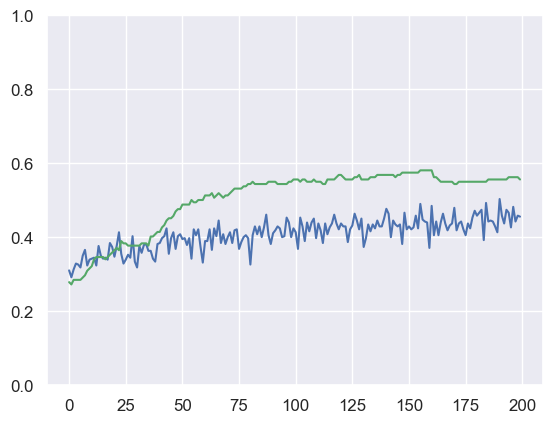

6/6 [==============================] - 2s 20ms/step
Inference done in 1.8977668285369873 s
              precision    recall  f1-score   support

           0       0.33      0.59      0.42        22
           1       0.38      0.32      0.35        37
           2       0.72      0.63      0.67       103

    accuracy                           0.56       162
   macro avg       0.47      0.52      0.48       162
weighted avg       0.59      0.56      0.56       162



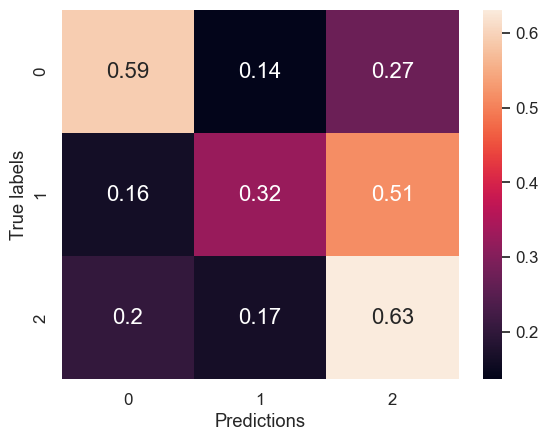

---- Trial n°1 ----
Epoch 1/200
2/2 [==============================] - 14s 2s/step - loss: 382.9600 - accuracy: 0.3280 - val_loss: 381.5094 - val_accuracy: 0.2840
Epoch 2/200
2/2 [==============================] - 1s 301ms/step - loss: 382.0853 - accuracy: 0.3280 - val_loss: 380.6381 - val_accuracy: 0.2901
Epoch 3/200
2/2 [==============================] - 1s 359ms/step - loss: 381.1335 - accuracy: 0.3413 - val_loss: 379.7692 - val_accuracy: 0.2840
Epoch 4/200
2/2 [==============================] - 1s 316ms/step - loss: 380.3067 - accuracy: 0.3571 - val_loss: 378.9017 - val_accuracy: 0.2963
Epoch 5/200
2/2 [==============================] - 1s 337ms/step - loss: 379.4222 - accuracy: 0.3201 - val_loss: 378.0362 - val_accuracy: 0.3025
Epoch 6/200
2/2 [==============================] - 1s 310ms/step - loss: 378.3982 - accuracy: 0.3704 - val_loss: 377.1724 - val_accuracy: 0.3148
Epoch 7/200
2/2 [==============================] - 1s 350ms/step - loss: 377.5998 - accuracy: 0.3862 - val_loss:

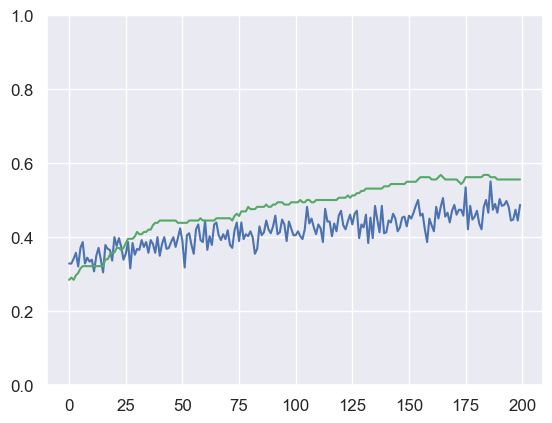

6/6 [==============================] - 2s 24ms/step
Inference done in 2.305755853652954 s
              precision    recall  f1-score   support

           0       0.26      0.50      0.34        22
           1       0.46      0.46      0.46        37
           2       0.75      0.60      0.67       103

    accuracy                           0.56       162
   macro avg       0.49      0.52      0.49       162
weighted avg       0.62      0.56      0.58       162



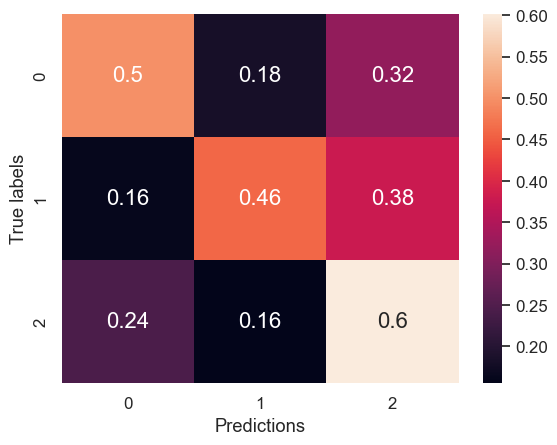

---- Trial n°2 ----
Epoch 1/200
2/2 [==============================] - 15s 2s/step - loss: 325.1756 - accuracy: 0.3016 - val_loss: 324.0174 - val_accuracy: 0.1667
Epoch 2/200
2/2 [==============================] - 1s 412ms/step - loss: 324.2454 - accuracy: 0.3492 - val_loss: 323.2803 - val_accuracy: 0.1728
Epoch 3/200
2/2 [==============================] - 1s 320ms/step - loss: 323.5666 - accuracy: 0.3280 - val_loss: 322.5467 - val_accuracy: 0.1728
Epoch 4/200
2/2 [==============================] - 1s 368ms/step - loss: 322.8151 - accuracy: 0.3492 - val_loss: 321.8148 - val_accuracy: 0.1728
Epoch 5/200
2/2 [==============================] - 1s 354ms/step - loss: 322.4556 - accuracy: 0.2672 - val_loss: 321.0826 - val_accuracy: 0.1728
Epoch 6/200
2/2 [==============================] - 1s 382ms/step - loss: 321.4818 - accuracy: 0.3122 - val_loss: 320.3535 - val_accuracy: 0.1790
Epoch 7/200
2/2 [==============================] - 1s 416ms/step - loss: 320.8066 - accuracy: 0.3492 - val_loss:

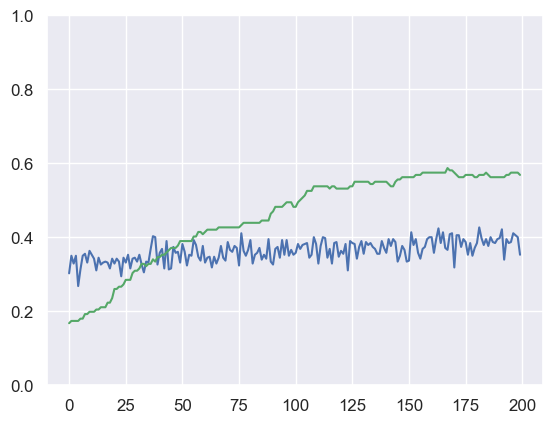

6/6 [==============================] - 2s 27ms/step
Inference done in 1.7580883502960205 s
              precision    recall  f1-score   support

           0       0.30      0.55      0.39        22
           1       0.41      0.38      0.39        37
           2       0.75      0.64      0.69       103

    accuracy                           0.57       162
   macro avg       0.49      0.52      0.49       162
weighted avg       0.61      0.57      0.58       162



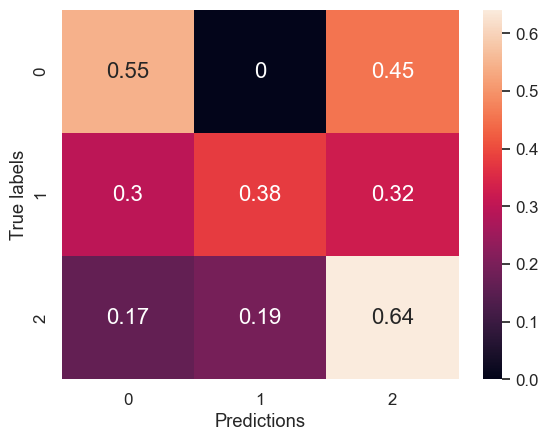

---- Trial n°3 ----
Epoch 1/200
2/2 [==============================] - 15s 2s/step - loss: 381.0840 - accuracy: 0.3042 - val_loss: 379.7625 - val_accuracy: 0.3395
Epoch 2/200
2/2 [==============================] - 1s 426ms/step - loss: 380.2483 - accuracy: 0.3333 - val_loss: 378.8934 - val_accuracy: 0.3642
Epoch 3/200
2/2 [==============================] - 1s 382ms/step - loss: 379.4423 - accuracy: 0.3201 - val_loss: 378.0282 - val_accuracy: 0.3951
Epoch 4/200
2/2 [==============================] - 1s 415ms/step - loss: 378.4871 - accuracy: 0.3307 - val_loss: 377.1661 - val_accuracy: 0.4136
Epoch 5/200
2/2 [==============================] - 1s 422ms/step - loss: 377.6821 - accuracy: 0.3280 - val_loss: 376.3051 - val_accuracy: 0.4136
Epoch 6/200
2/2 [==============================] - 1s 432ms/step - loss: 376.9105 - accuracy: 0.3386 - val_loss: 375.4472 - val_accuracy: 0.4074
Epoch 7/200
2/2 [==============================] - 1s 400ms/step - loss: 376.0151 - accuracy: 0.3466 - val_loss:

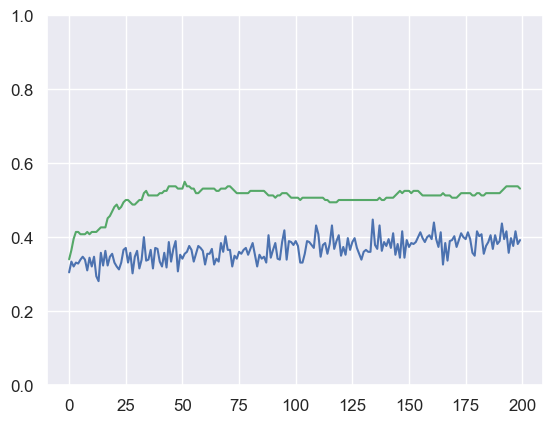

6/6 [==============================] - 2s 33ms/step
Inference done in 1.948232650756836 s
              precision    recall  f1-score   support

           0       0.30      0.41      0.35        22
           1       0.36      0.41      0.38        37
           2       0.69      0.60      0.64       103

    accuracy                           0.53       162
   macro avg       0.45      0.47      0.46       162
weighted avg       0.56      0.53      0.54       162



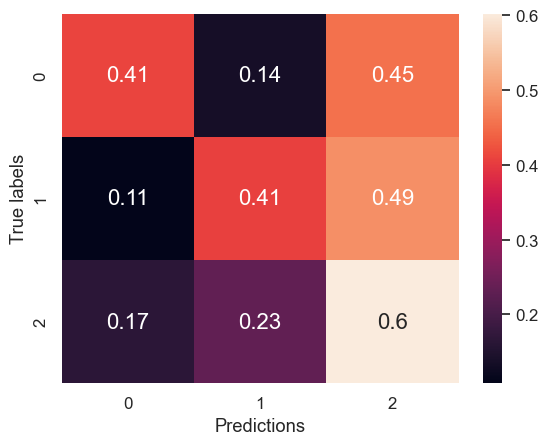

---- Trial n°4 ----
Epoch 1/200
2/2 [==============================] - 15s 3s/step - loss: 358.9862 - accuracy: 0.3783 - val_loss: 357.7982 - val_accuracy: 0.1975
Epoch 2/200
2/2 [==============================] - 2s 2s/step - loss: 358.2271 - accuracy: 0.3677 - val_loss: 356.8215 - val_accuracy: 0.1975
Epoch 3/200
2/2 [==============================] - 3s 2s/step - loss: 357.2086 - accuracy: 0.3519 - val_loss: 355.8489 - val_accuracy: 0.1975
Epoch 4/200
2/2 [==============================] - 3s 2s/step - loss: 356.2408 - accuracy: 0.3386 - val_loss: 354.8797 - val_accuracy: 0.1975
Epoch 5/200
2/2 [==============================] - 3s 2s/step - loss: 355.2168 - accuracy: 0.3783 - val_loss: 353.9125 - val_accuracy: 0.2037
Epoch 6/200
2/2 [==============================] - 3s 2s/step - loss: 354.3557 - accuracy: 0.3704 - val_loss: 352.9467 - val_accuracy: 0.2099
Epoch 7/200
2/2 [==============================] - 3s 2s/step - loss: 353.2919 - accuracy: 0.3466 - val_loss: 351.9833 - val_ac

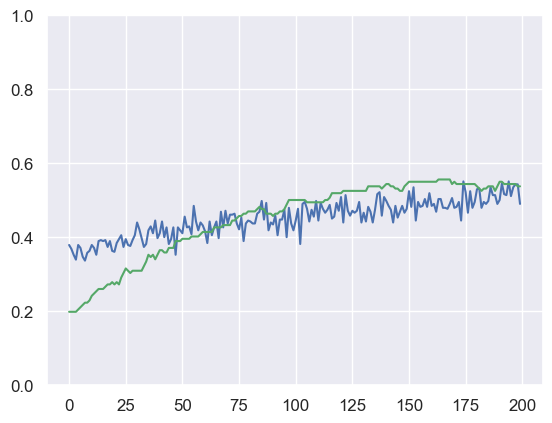

6/6 [==============================] - 4s 102ms/step
Inference done in 4.578890085220337 s
              precision    recall  f1-score   support

           0       0.31      0.55      0.39        22
           1       0.31      0.30      0.31        37
           2       0.73      0.62      0.67       103

    accuracy                           0.54       162
   macro avg       0.45      0.49      0.46       162
weighted avg       0.58      0.54      0.55       162



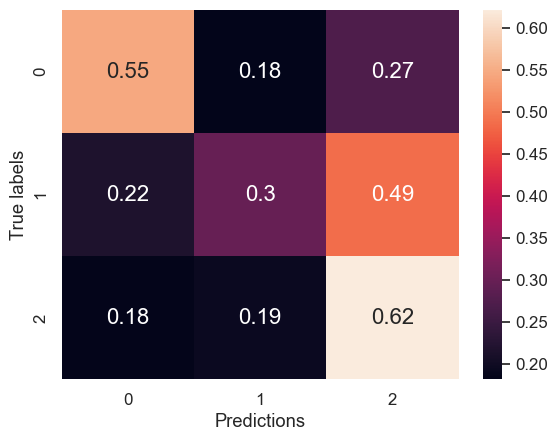

---- Trial n°5 ----
Epoch 1/200
2/2 [==============================] - 29s 7s/step - loss: 425.7859 - accuracy: 0.3175 - val_loss: 424.1556 - val_accuracy: 0.5679
Epoch 2/200
2/2 [==============================] - 8s 4s/step - loss: 424.5778 - accuracy: 0.3704 - val_loss: 422.9935 - val_accuracy: 0.5926
Epoch 3/200
2/2 [==============================] - 8s 4s/step - loss: 423.4940 - accuracy: 0.3201 - val_loss: 421.8354 - val_accuracy: 0.6111
Epoch 4/200
2/2 [==============================] - 8s 4s/step - loss: 422.2335 - accuracy: 0.3254 - val_loss: 420.6801 - val_accuracy: 0.6173
Epoch 5/200
2/2 [==============================] - 8s 4s/step - loss: 421.2774 - accuracy: 0.3201 - val_loss: 419.5290 - val_accuracy: 0.6235
Epoch 6/200
2/2 [==============================] - 8s 4s/step - loss: 420.1120 - accuracy: 0.2619 - val_loss: 418.3800 - val_accuracy: 0.6296
Epoch 7/200
2/2 [==============================] - 8s 4s/step - loss: 418.7665 - accuracy: 0.3598 - val_loss: 417.2333 - val_ac

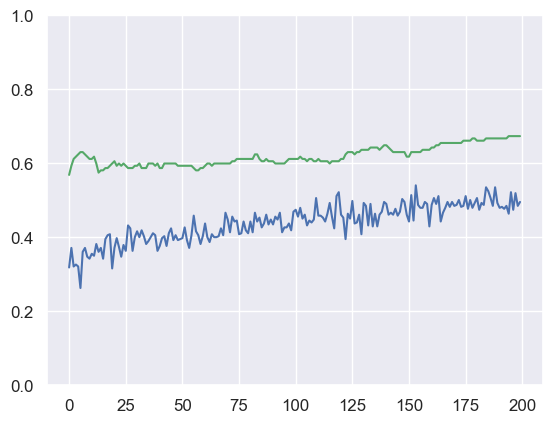

6/6 [==============================] - 2s 106ms/step
Inference done in 1.6297357082366943 s
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        22
           1       0.55      0.46      0.50        37
           2       0.77      0.77      0.77       103

    accuracy                           0.67       162
   macro avg       0.59      0.61      0.59       162
weighted avg       0.68      0.67      0.67       162



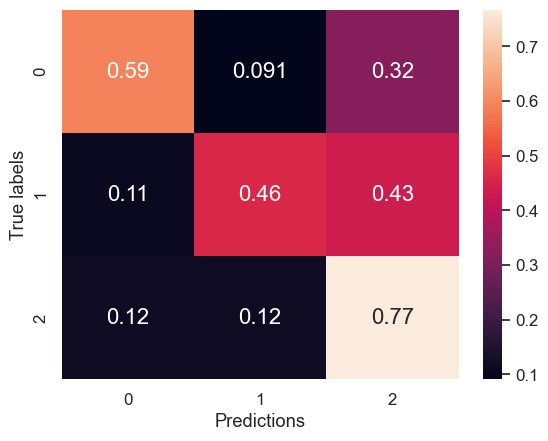

---- Trial n°6 ----
Epoch 1/200
2/2 [==============================] - 14s 4s/step - loss: 360.0156 - accuracy: 0.3360 - val_loss: 358.5452 - val_accuracy: 0.2407
Epoch 2/200
2/2 [==============================] - 7s 3s/step - loss: 359.0859 - accuracy: 0.2804 - val_loss: 357.5755 - val_accuracy: 0.2407
Epoch 3/200
2/2 [==============================] - 6s 3s/step - loss: 358.0524 - accuracy: 0.3571 - val_loss: 356.6102 - val_accuracy: 0.2531
Epoch 4/200
2/2 [==============================] - 6s 3s/step - loss: 357.0990 - accuracy: 0.3201 - val_loss: 355.6474 - val_accuracy: 0.2593
Epoch 5/200
2/2 [==============================] - 6s 3s/step - loss: 356.1504 - accuracy: 0.3042 - val_loss: 354.6872 - val_accuracy: 0.2593
Epoch 6/200
2/2 [==============================] - 6s 3s/step - loss: 355.2044 - accuracy: 0.2937 - val_loss: 353.7293 - val_accuracy: 0.2593
Epoch 7/200
2/2 [==============================] - 6s 3s/step - loss: 354.2958 - accuracy: 0.3307 - val_loss: 352.7743 - val_ac

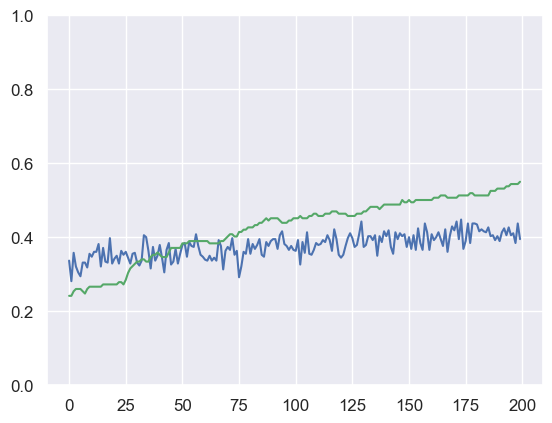

6/6 [==============================] - 2s 112ms/step
Inference done in 1.8071143627166748 s
              precision    recall  f1-score   support

           0       0.32      0.50      0.39        22
           1       0.40      0.46      0.42        37
           2       0.72      0.59      0.65       103

    accuracy                           0.55       162
   macro avg       0.48      0.52      0.49       162
weighted avg       0.59      0.55      0.56       162



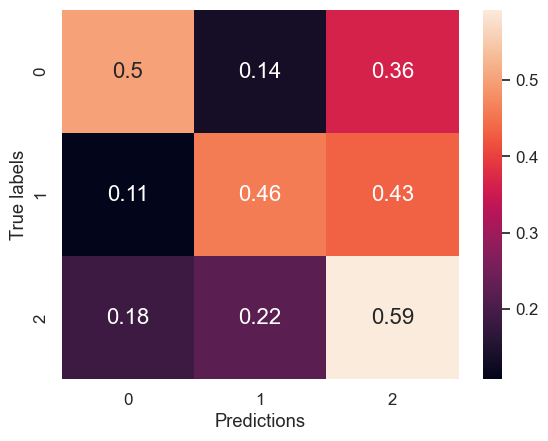

---- Trial n°7 ----
Epoch 1/200
2/2 [==============================] - 16s 5s/step - loss: 427.4100 - accuracy: 0.3439 - val_loss: 425.6098 - val_accuracy: 0.4383
Epoch 2/200
2/2 [==============================] - 7s 4s/step - loss: 426.2270 - accuracy: 0.3545 - val_loss: 424.4554 - val_accuracy: 0.4198
Epoch 3/200
2/2 [==============================] - 7s 4s/step - loss: 425.0935 - accuracy: 0.3386 - val_loss: 423.3061 - val_accuracy: 0.4259
Epoch 4/200
2/2 [==============================] - 7s 3s/step - loss: 423.7800 - accuracy: 0.3492 - val_loss: 422.1594 - val_accuracy: 0.4198
Epoch 5/200
2/2 [==============================] - 6s 3s/step - loss: 422.7944 - accuracy: 0.3651 - val_loss: 421.0165 - val_accuracy: 0.4259
Epoch 6/200
2/2 [==============================] - 5s 3s/step - loss: 421.5661 - accuracy: 0.3413 - val_loss: 419.8766 - val_accuracy: 0.4259
Epoch 7/200
2/2 [==============================] - 6s 3s/step - loss: 420.3654 - accuracy: 0.3571 - val_loss: 418.7392 - val_ac

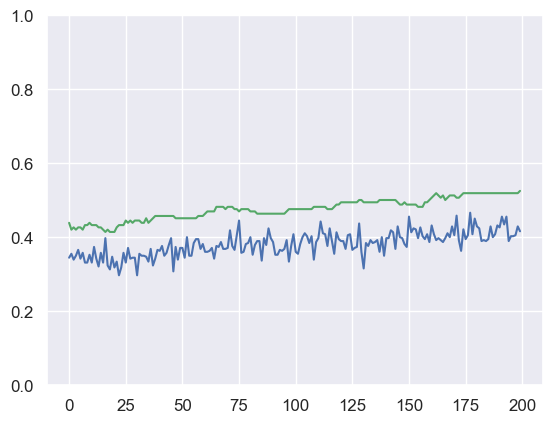

6/6 [==============================] - 2s 94ms/step
Inference done in 1.8161451816558838 s
              precision    recall  f1-score   support

           0       0.25      0.45      0.32        22
           1       0.34      0.32      0.33        37
           2       0.72      0.61      0.66       103

    accuracy                           0.52       162
   macro avg       0.44      0.46      0.44       162
weighted avg       0.57      0.52      0.54       162



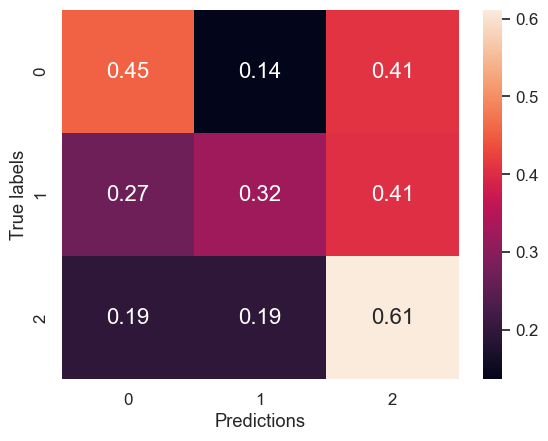

---- Trial n°8 ----
Epoch 1/200
2/2 [==============================] - 17s 4s/step - loss: 436.5673 - accuracy: 0.3175 - val_loss: 434.8935 - val_accuracy: 0.2593
Epoch 2/200
2/2 [==============================] - 6s 3s/step - loss: 435.1024 - accuracy: 0.3783 - val_loss: 433.6838 - val_accuracy: 0.2593
Epoch 3/200
2/2 [==============================] - 6s 3s/step - loss: 433.8771 - accuracy: 0.4259 - val_loss: 432.4799 - val_accuracy: 0.2654
Epoch 4/200
2/2 [==============================] - 6s 3s/step - loss: 432.6928 - accuracy: 0.3571 - val_loss: 431.2793 - val_accuracy: 0.2840
Epoch 5/200
2/2 [==============================] - 7s 3s/step - loss: 431.5549 - accuracy: 0.3598 - val_loss: 430.0810 - val_accuracy: 0.2963
Epoch 6/200
2/2 [==============================] - 7s 3s/step - loss: 430.2810 - accuracy: 0.3598 - val_loss: 428.8858 - val_accuracy: 0.3025
Epoch 7/200
2/2 [==============================] - 7s 4s/step - loss: 429.0899 - accuracy: 0.3651 - val_loss: 427.6942 - val_ac

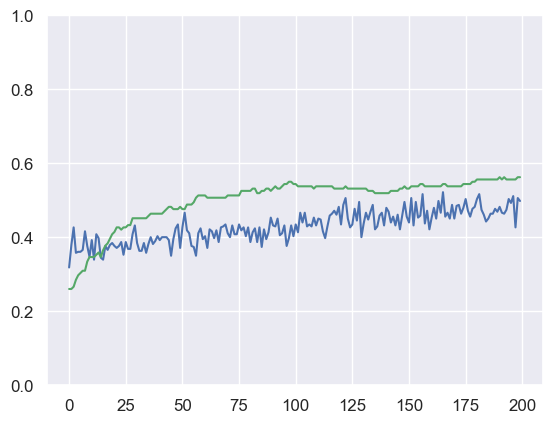

6/6 [==============================] - 1s 53ms/step
Inference done in 1.4333057403564453 s
              precision    recall  f1-score   support

           0       0.29      0.55      0.38        22
           1       0.41      0.43      0.42        37
           2       0.77      0.61      0.68       103

    accuracy                           0.56       162
   macro avg       0.49      0.53      0.49       162
weighted avg       0.62      0.56      0.58       162



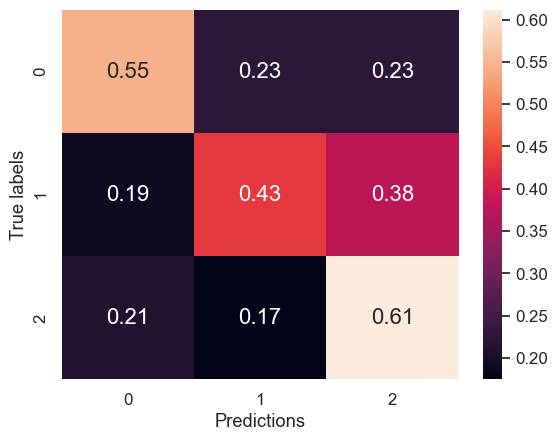

---- Trial n°9 ----
Epoch 1/200
2/2 [==============================] - 14s 4s/step - loss: 513.7112 - accuracy: 0.3598 - val_loss: 511.6458 - val_accuracy: 0.6049
Epoch 2/200
2/2 [==============================] - 6s 3s/step - loss: 512.1672 - accuracy: 0.3624 - val_loss: 510.2202 - val_accuracy: 0.6049
Epoch 3/200
2/2 [==============================] - 6s 3s/step - loss: 510.8360 - accuracy: 0.3466 - val_loss: 508.7999 - val_accuracy: 0.6049
Epoch 4/200
2/2 [==============================] - 5s 3s/step - loss: 509.2915 - accuracy: 0.3836 - val_loss: 507.3840 - val_accuracy: 0.6049
Epoch 5/200
2/2 [==============================] - 5s 3s/step - loss: 507.9707 - accuracy: 0.3862 - val_loss: 505.9725 - val_accuracy: 0.6049
Epoch 6/200
2/2 [==============================] - 6s 3s/step - loss: 506.5639 - accuracy: 0.3519 - val_loss: 504.5646 - val_accuracy: 0.6049
Epoch 7/200
2/2 [==============================] - 6s 3s/step - loss: 505.1684 - accuracy: 0.3519 - val_loss: 503.1601 - val_ac

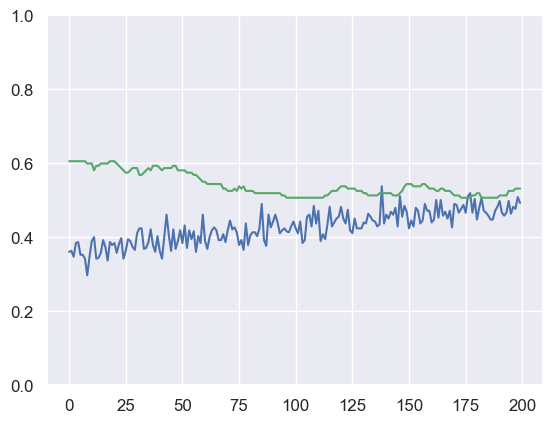

6/6 [==============================] - 2s 107ms/step
Inference done in 1.6859145164489746 s
              precision    recall  f1-score   support

           0       0.29      0.55      0.38        22
           1       0.37      0.43      0.40        37
           2       0.74      0.56      0.64       103

    accuracy                           0.53       162
   macro avg       0.47      0.51      0.47       162
weighted avg       0.60      0.53      0.55       162



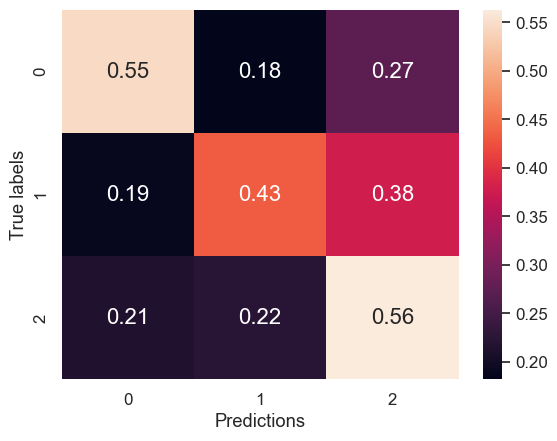

---- Trial n°10 ----
Epoch 1/200
2/2 [==============================] - 13s 4s/step - loss: 436.0612 - accuracy: 0.3466 - val_loss: 434.5204 - val_accuracy: 0.2407
Epoch 2/200
2/2 [==============================] - 6s 3s/step - loss: 434.9499 - accuracy: 0.3280 - val_loss: 433.3206 - val_accuracy: 0.2469
Epoch 3/200
2/2 [==============================] - 6s 3s/step - loss: 433.7870 - accuracy: 0.3042 - val_loss: 432.1262 - val_accuracy: 0.2531
Epoch 4/200
2/2 [==============================] - 6s 3s/step - loss: 432.6093 - accuracy: 0.3307 - val_loss: 430.9359 - val_accuracy: 0.2531
Epoch 5/200
2/2 [==============================] - 6s 3s/step - loss: 431.3594 - accuracy: 0.3466 - val_loss: 429.7505 - val_accuracy: 0.2593
Epoch 6/200
2/2 [==============================] - 5s 2s/step - loss: 430.1141 - accuracy: 0.3519 - val_loss: 428.5672 - val_accuracy: 0.2593
Epoch 7/200
2/2 [==============================] - 4s 2s/step - loss: 428.9602 - accuracy: 0.3254 - val_loss: 427.3867 - val_a

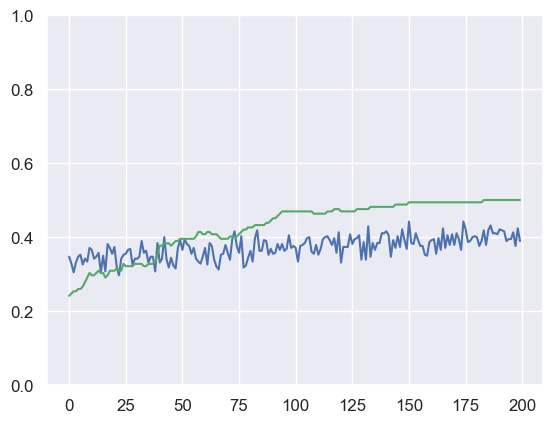

6/6 [==============================] - 2s 188ms/step
Inference done in 2.1948957443237305 s
              precision    recall  f1-score   support

           0       0.23      0.45      0.31        22
           1       0.38      0.51      0.44        37
           2       0.75      0.50      0.60       103

    accuracy                           0.50       162
   macro avg       0.46      0.49      0.45       162
weighted avg       0.60      0.50      0.53       162



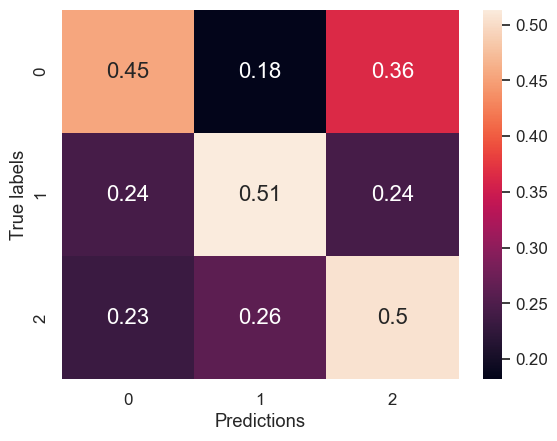

---- Trial n°11 ----
Epoch 1/200
2/2 [==============================] - 13s 4s/step - loss: 514.5998 - accuracy: 0.3333 - val_loss: 512.6501 - val_accuracy: 0.4321
Epoch 2/200
2/2 [==============================] - 7s 3s/step - loss: 513.1476 - accuracy: 0.3836 - val_loss: 511.2305 - val_accuracy: 0.4444
Epoch 3/200
2/2 [==============================] - 7s 3s/step - loss: 511.7560 - accuracy: 0.3413 - val_loss: 509.8169 - val_accuracy: 0.4506
Epoch 4/200
2/2 [==============================] - 7s 3s/step - loss: 510.4521 - accuracy: 0.3228 - val_loss: 508.4073 - val_accuracy: 0.4568
Epoch 5/200
2/2 [==============================] - 7s 3s/step - loss: 508.9807 - accuracy: 0.3069 - val_loss: 507.0019 - val_accuracy: 0.4568
Epoch 6/200
2/2 [==============================] - 6s 3s/step - loss: 507.4977 - accuracy: 0.3624 - val_loss: 505.6001 - val_accuracy: 0.4691
Epoch 7/200
2/2 [==============================] - 7s 3s/step - loss: 506.3079 - accuracy: 0.3095 - val_loss: 504.2024 - val_a

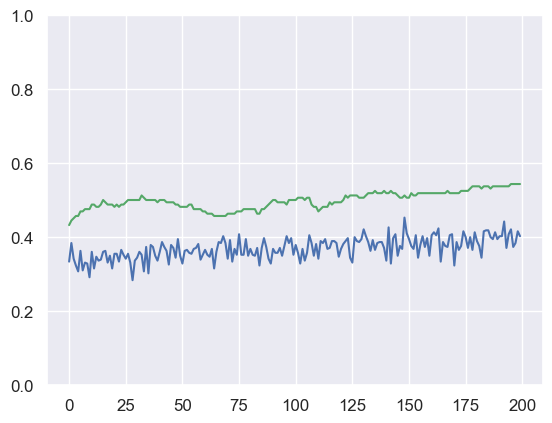

6/6 [==============================] - 2s 189ms/step
Inference done in 2.4940176010131836 s
              precision    recall  f1-score   support

           0       0.29      0.55      0.37        22
           1       0.33      0.27      0.30        37
           2       0.73      0.64      0.68       103

    accuracy                           0.54       162
   macro avg       0.45      0.49      0.45       162
weighted avg       0.58      0.54      0.55       162



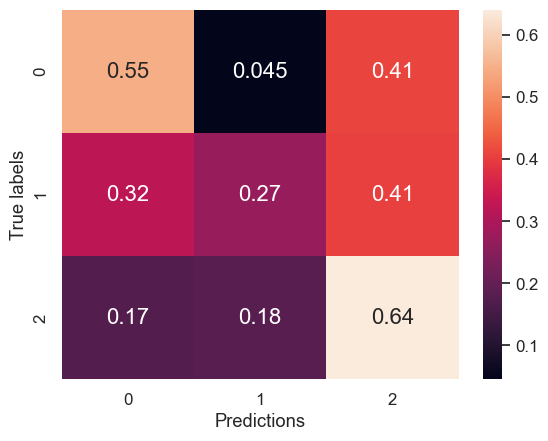

---- Trial n°12 ----
Epoch 1/200
2/2 [==============================] - 21s 7s/step - loss: 530.8372 - accuracy: 0.3228 - val_loss: 528.7648 - val_accuracy: 0.2901
Epoch 2/200
2/2 [==============================] - 13s 7s/step - loss: 529.1964 - accuracy: 0.3228 - val_loss: 527.0760 - val_accuracy: 0.3086
Epoch 3/200
2/2 [==============================] - 12s 6s/step - loss: 527.4654 - accuracy: 0.3545 - val_loss: 525.3953 - val_accuracy: 0.3148
Epoch 4/200
2/2 [==============================] - 14s 7s/step - loss: 525.8867 - accuracy: 0.3095 - val_loss: 523.7213 - val_accuracy: 0.3148
Epoch 5/200
2/2 [==============================] - 14s 7s/step - loss: 524.1417 - accuracy: 0.3413 - val_loss: 522.0504 - val_accuracy: 0.3272
Epoch 6/200
2/2 [==============================] - 11s 5s/step - loss: 522.4346 - accuracy: 0.3519 - val_loss: 520.3832 - val_accuracy: 0.3086
Epoch 7/200
2/2 [==============================] - 13s 7s/step - loss: 520.7979 - accuracy: 0.3519 - val_loss: 518.7192 -

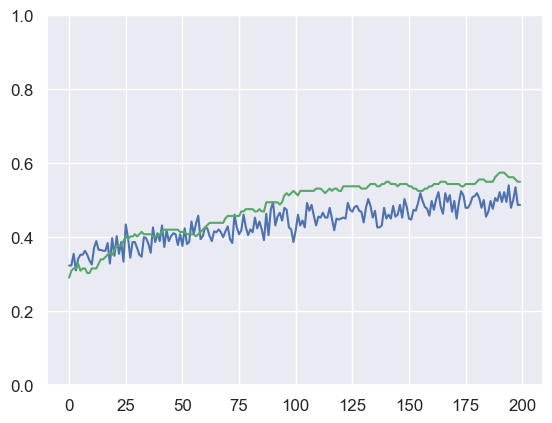

6/6 [==============================] - 3s 288ms/step
Inference done in 2.7953808307647705 s
              precision    recall  f1-score   support

           0       0.28      0.68      0.40        22
           1       0.45      0.38      0.41        37
           2       0.77      0.58      0.66       103

    accuracy                           0.55       162
   macro avg       0.50      0.55      0.49       162
weighted avg       0.63      0.55      0.57       162



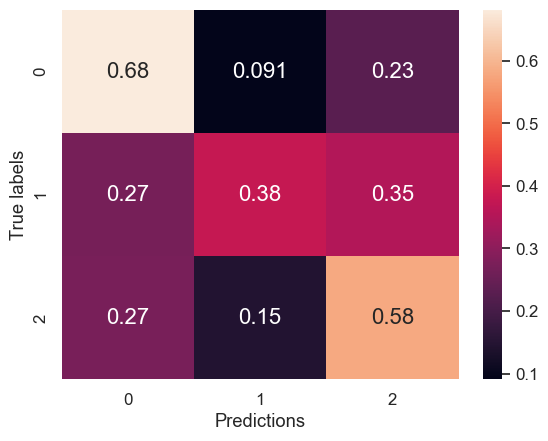

---- Trial n°13 ----
Epoch 1/200
2/2 [==============================] - 19s 7s/step - loss: 624.1212 - accuracy: 0.3545 - val_loss: 621.9066 - val_accuracy: 0.2222
Epoch 2/200
2/2 [==============================] - 11s 6s/step - loss: 622.0398 - accuracy: 0.3095 - val_loss: 619.9083 - val_accuracy: 0.2284
Epoch 3/200
2/2 [==============================] - 11s 6s/step - loss: 620.0013 - accuracy: 0.3757 - val_loss: 617.9180 - val_accuracy: 0.2346
Epoch 4/200
2/2 [==============================] - 11s 6s/step - loss: 618.0164 - accuracy: 0.3466 - val_loss: 615.9317 - val_accuracy: 0.2222
Epoch 5/200
2/2 [==============================] - 11s 6s/step - loss: 615.9608 - accuracy: 0.3942 - val_loss: 613.9510 - val_accuracy: 0.2284
Epoch 6/200
2/2 [==============================] - 11s 6s/step - loss: 614.0540 - accuracy: 0.3360 - val_loss: 611.9759 - val_accuracy: 0.2222
Epoch 7/200
2/2 [==============================] - 11s 6s/step - loss: 612.0305 - accuracy: 0.3942 - val_loss: 610.0055 -

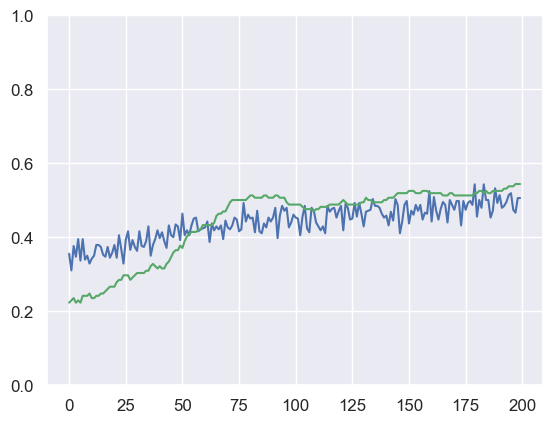

6/6 [==============================] - 3s 327ms/step
Inference done in 3.1546590328216553 s
              precision    recall  f1-score   support

           0       0.30      0.45      0.36        22
           1       0.39      0.51      0.44        37
           2       0.74      0.57      0.64       103

    accuracy                           0.54       162
   macro avg       0.48      0.51      0.48       162
weighted avg       0.60      0.54      0.56       162



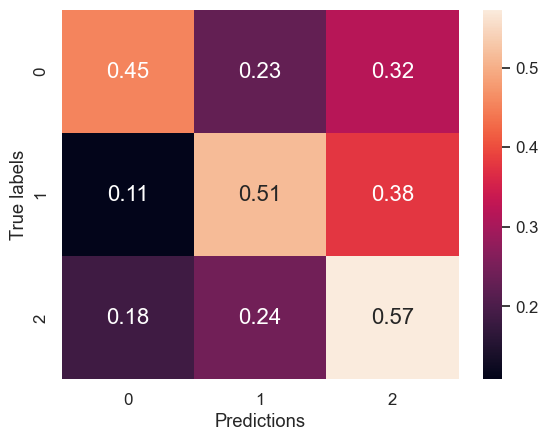

---- Trial n°14 ----
Epoch 1/200
2/2 [==============================] - 19s 7s/step - loss: 529.3123 - accuracy: 0.3519 - val_loss: 527.1375 - val_accuracy: 0.3272
Epoch 2/200
2/2 [==============================] - 12s 6s/step - loss: 527.5720 - accuracy: 0.3571 - val_loss: 525.4606 - val_accuracy: 0.3210
Epoch 3/200
2/2 [==============================] - 11s 5s/step - loss: 525.8524 - accuracy: 0.3280 - val_loss: 523.7914 - val_accuracy: 0.3148
Epoch 4/200
2/2 [==============================] - 16s 8s/step - loss: 524.2870 - accuracy: 0.2910 - val_loss: 522.1290 - val_accuracy: 0.3086
Epoch 5/200
2/2 [==============================] - 16s 8s/step - loss: 522.4826 - accuracy: 0.3810 - val_loss: 520.4717 - val_accuracy: 0.3148
Epoch 6/200
2/2 [==============================] - 17s 9s/step - loss: 520.8967 - accuracy: 0.3228 - val_loss: 518.8179 - val_accuracy: 0.3148
Epoch 7/200
2/2 [==============================] - 18s 9s/step - loss: 519.2170 - accuracy: 0.3386 - val_loss: 517.1693 -

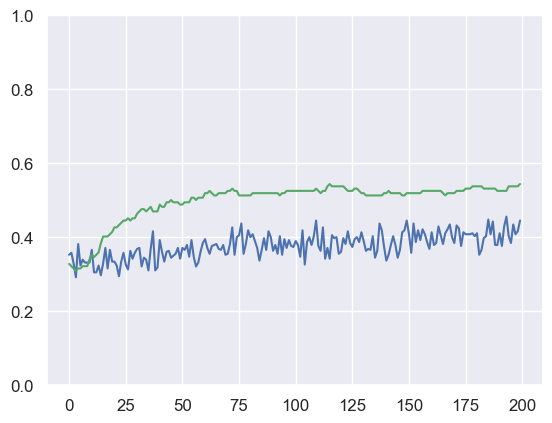

6/6 [==============================] - 4s 422ms/step
Inference done in 3.7218852043151855 s
              precision    recall  f1-score   support

           0       0.31      0.45      0.37        22
           1       0.38      0.46      0.41        37
           2       0.72      0.59      0.65       103

    accuracy                           0.54       162
   macro avg       0.47      0.50      0.48       162
weighted avg       0.59      0.54      0.56       162



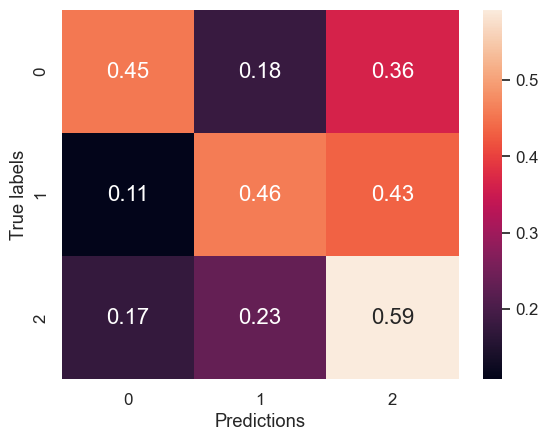

---- Trial n°15 ----
Epoch 1/200
2/2 [==============================] - 27s 11s/step - loss: 624.1899 - accuracy: 0.3280 - val_loss: 621.7603 - val_accuracy: 0.2469
Epoch 2/200
2/2 [==============================] - 19s 10s/step - loss: 622.1643 - accuracy: 0.2910 - val_loss: 619.7688 - val_accuracy: 0.2593
Epoch 3/200
2/2 [==============================] - 19s 10s/step - loss: 620.0955 - accuracy: 0.3307 - val_loss: 617.7860 - val_accuracy: 0.2593
Epoch 4/200
2/2 [==============================] - 19s 9s/step - loss: 618.0571 - accuracy: 0.3466 - val_loss: 615.8091 - val_accuracy: 0.2778
Epoch 5/200
2/2 [==============================] - 18s 9s/step - loss: 616.0728 - accuracy: 0.3598 - val_loss: 613.8387 - val_accuracy: 0.2840
Epoch 6/200
2/2 [==============================] - 19s 9s/step - loss: 614.1114 - accuracy: 0.3730 - val_loss: 611.8737 - val_accuracy: 0.2901
Epoch 7/200
2/2 [==============================] - 19s 10s/step - loss: 612.2866 - accuracy: 0.3413 - val_loss: 609.91

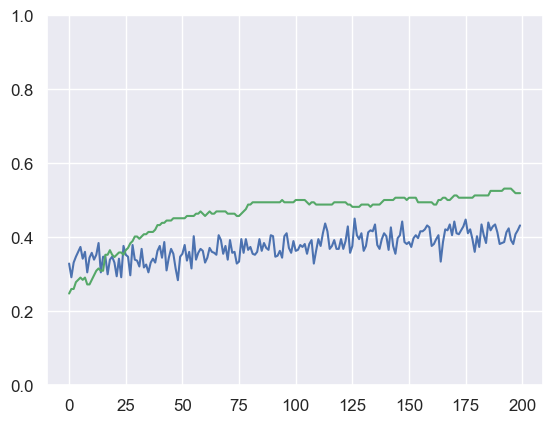

6/6 [==============================] - 4s 471ms/step
Inference done in 3.899033308029175 s
              precision    recall  f1-score   support

           0       0.24      0.41      0.30        22
           1       0.40      0.51      0.45        37
           2       0.74      0.54      0.63       103

    accuracy                           0.52       162
   macro avg       0.46      0.49      0.46       162
weighted avg       0.59      0.52      0.54       162



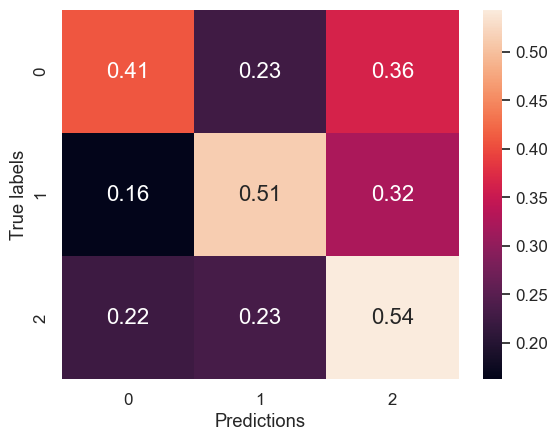

Best units layer 1 : 64
Best units layer 2 : 128
Best dropout : 0.55
Best regulation : 0.65
Best accuracy : 0.6728395061728395
Achieved at trial 5


In [17]:
# One Hot encoding
y_train_encoded = []
for k in range(len(Y_train)):
    if (Y_train[k] == 0):
        y_train_encoded += [[1,0,0]]
    elif (Y_train[k] == 1):
        y_train_encoded += [[0,1,0]]
    else:
        y_train_encoded += [[0,0,1]]

y_test_encoded = []
for k in range(len(Y_test)):
    if (Y_test[k] == 0):
        y_test_encoded += [[1,0,0]]
    elif (Y_test[k] == 1):
        y_test_encoded += [[0,1,0]]
    else:
        y_test_encoded += [[0,0,1]]

Y_trn = np.array(y_train_encoded)
Y_tst = np.array(y_test_encoded)
    
max_acc = 0
trial = 0
for units1 in units_layer1:
    for units2 in units_layer2:
        for dropo in drop:
#             for mlp in mlp_drop:
            for regu in reg:
                
                print("---- Trial n°%s ----" %trial)
                
                # augmented_data_array = np.array(augmented_data)
                # augmented_labels_array = np.array(augmented_labels)

                # Model creation

                # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

                model = tf.keras.models.Sequential()
                model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units1, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(regu), return_sequences=True))) # kernel_regularizer=tf.keras.regularizers.L2(0.05),
                model.add(tf.keras.layers.BatchNormalization())
                model.add(tf.keras.layers.Dropout(dropo))
                model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units2, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(regu))))
                model.add(tf.keras.layers.BatchNormalization())
                model.add(tf.keras.layers.Dropout(dropo))
#                 model.add(tf.keras.layers.Dense(1024, activation='tanh'))
#                 model.add(tf.keras.layers.Dropout(0.3))
                model.add(tf.keras.layers.Dense(256, activation='tanh'))
                model.add(tf.keras.layers.Dropout(0.3))
                model.add(tf.keras.layers.Dense(128, activation='tanh'))
                model.add(tf.keras.layers.BatchNormalization())
                model.add(tf.keras.layers.Dropout(0.3))
                model.add(tf.keras.layers.Dense(3, activation='softmax'))

                opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

                model.compile(loss='categorical_crossentropy',
                              optimizer=opt,
                              metrics=['accuracy'])

                ## Model training
                start_time = time.time()
#                 epoch = 200
#                 batch_size = 128
#                 history_val = []
#                 history_test = []
#                 for k in range(epoch):
#                     print("----- Epoch n°%s/200 -----" %(k+1))

#                     skf = StratifiedKFold(n_splits=10, shuffle=True)

#                     flag = 1
#                     for index, (train_indices, val_indices) in enumerate(skf.split(X_train, Y_train)):
#                         #print("Training on fold " + str(index+1) + "/10...")

#                         xfold = X_train[train_indices]
#                         xval_fold = X_train[val_indices]
#                         yfold = Y_trn[train_indices]
#                         yval_fold = Y_trn[val_indices]

# #                         for batch in range(int(len(xfold)/batch_size)+1):

# #                         # Batch cutting
# #                             batch_x = xfold[batch:(batch+batch_size)]
# #                             batch_y = yfold[batch:(batch+batch_size)]

#                         # K-fold train
#                 #         history = model.fit(xfold,yfold)
#                         history = model.train_on_batch(xfold,yfold)
# #                         history = model.train_on_batch(batch_x,batch_y)
#                 #         print(model.metrics_names)
#                         accuracy = history[1]
#                         loss = history[0]
#                         #print("Training acc: " + str(accuracy) + ", loss: " + str(loss))

#                         # K-fold validation
#                 #         values = model.evaluate(xval_fold,yval_fold)
#                         values = model.test_on_batch(xval_fold,yval_fold)
#                         if flag:
#                             history_val += [values]
#                             flag = 0
#                         accuracy_val = values[1]
#                         loss_val = values[0]
#                         #print("Val acc: " + str(accuracy_val) + ", loss: " + str(loss_val))

#                     # Testing
#                 #     history_test += [model.evaluate(X_test,Y_tst)]
#                     history_test += [model.test_on_batch(X_test,Y_tst)]
#                     accuracy_test = history_test[-1][1]
#                     loss_test = history_test[-1][0]
#                     print("Testing acc: " + str(accuracy_test) + ", loss: " + str(loss_test))

#                 callback = tf.keras.callbacks.EarlyStopping(patience=20)
                history = model.fit(X_train, 
                                    Y_trn, 
                                    validation_data=(X_test, Y_tst), 
                                    batch_size=256, 
                                    epochs=200, 
#                                     callbacks=[callback], 
                                    verbose=1)

                print("Training done in %s s" %(time.time()-start_time))

#                 x = [x+1 for x in range(epoch)]

#                 loss = []
#                 acc = []
#                 val_loss = []
#                 val_acc = []
#                 for k in range(len(history_val)):
#                     loss += [history_val[k][0]]
#                     acc += [history_val[k][1]]
#                     val_loss += [history_test[k][0]]
#                     val_acc += [history_test[k][1]]
                
#                 plt.figure(trial*2)
#                 plt.plot(x,loss,color='orange') #"loss"
#                 plt.plot(x,acc,color='blue') #"acc"
#                 plt.plot(x,val_loss,color='red') #"val_loss"
#                 plt.plot(x,val_acc,color='green') #"val_acc"
#                 plt.ylim(0,1)
#                 plt.show()

                plt.figure()
                plt.plot(history.history['accuracy'])
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_accuracy'])
                plt.plot(history.history['val_loss'])
                plt.ylim(0,1)
                plt.show()
                
                inf_time = time.time()
                y_pred = model.predict(X_test, verbose=1)
                print("Inference done in %s s" %(time.time()-inf_time))
            
                y_pred = np.argmax(y_pred, axis=1)
                acc = accuracy_score(Y_test,y_pred)

                output_test = np.argmax(Y_tst, axis=1)
                print(classification_report(output_test, y_pred))

                # print("F1_score : ",f1_score(output_test,y_pred))
                # print("Accuracy : ",accuracy_score(output_test,y_pred))
                # print("Precision : ",precision_score(output_test,y_pred))
                # print("Recall : ",recall_score(output_test,y_pred))

                plt.figure((trial*2)+1)
                cm = confusion_matrix(output_test, y_pred, normalize='true')
                df_cm = pd.DataFrame(cm, range(3), range(3))
                # plt.figure(figsize=(10,7))
                sn.set(font_scale=1.1)  # for label size
                sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})  # font size
                plt.title("BiLSTM, trial:", trial)
                plt.xlabel("Predictions")
                plt.ylabel("True labels")
                plt.show()
                
                if acc > max_acc:
                    max_acc = acc

                    best_unit1 = units1
                    best_unit2 = units2
                    best_dropout = dropo
#                     best_mlp_dropout = mlp_drop
                    best_reg = regu
                    which = trial
                    
#                     model.save("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/BiLSTM.h5")
#                     model.save_weights("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/BiLSTMweights.h5")
                
                trial += 1
                
print("Best units layer 1 :", best_unit1)
print("Best units layer 2 :", best_unit2)
print("Best dropout :", best_dropout)
# print("Best mlp_drop :", best_mlp_dropout)
print("Best regulation :", best_reg)

print("Best accuracy :", max_acc)
print("Achieved at trial %s" %which)


In [18]:

###

# x_train, x_test, y_train, y_test = train_test_split(data, y5, test_size=0.2) #, random_state=42)
# X_train = np.array(x_train)#.astype('float32')
# X_test = np.array(x_test)#.astype('float32')
# Y_train = np.array(y_train)
# Y_test = np.array(y_test)

# # One Hot encoding
# y_train_encoded = []
# for k in range(len(Y_train)):
#     if (Y_train[k] == 0):
#         y_train_encoded += [[1,0,0]]
#     elif (Y_train[k] == 1):
#         y_train_encoded += [[0,1,0]]
#     else:
#         y_train_encoded += [[0,0,1]]

# y_test_encoded = []
# for k in range(len(Y_test)):
#     if (Y_test[k] == 0):
#         y_test_encoded += [[1,0,0]]
#     elif (Y_test[k] == 1):
#         y_test_encoded += [[0,1,0]]
#     else:
#         y_test_encoded += [[0,0,1]]

# Y_trn = np.array(y_train_encoded)
# Y_tst = np.array(y_test_encoded)

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(best_unit1, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(best_reg), return_sequences=True))) # kernel_regularizer=tf.keras.regularizers.L2(0.05),
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(best_dropout))
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(best_unit2, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(best_reg))))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(best_dropout))
# model.add(tf.keras.layers.Dense(128, activation='tanh'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(3, activation='softmax'))

# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

# ## Model training
# start_time = time.time()
# epoch = 100
# # batch_size = 128
# history_val = []
# history_test = []
# for k in range(epoch):
#     print("----- Epoch n°%s/100 -----" %(k+1))

#     skf = StratifiedKFold(n_splits=10, shuffle=True)

#     flag = 1
#     for index, (train_indices, val_indices) in enumerate(skf.split(X_train, Y_train)):
#         #print("Training on fold " + str(index+1) + "/10...")

#         xfold = X_train[train_indices]
#         xval_fold = X_train[val_indices]
#         yfold = Y_trn[train_indices]
#         yval_fold = Y_trn[val_indices]

# #         for batch in range(int(len(xfold)/batch_size)+1):

#         # Batch cutting
# #             batch_x = xfold[batch:(batch+batch_size)]
# #             batch_y = yfold[batch:(batch+batch_size)]

#         # K-fold train
# #         history = model.fit(xfold,yfold)
#         history = model.train_on_batch(xfold,yfold)
# #             history = model.train_on_batch(batch_x,batch_y)
# #         print(model.metrics_names)
#         accuracy = history[1]
#         loss = history[0]
#         #print("Training acc: " + str(accuracy) + ", loss: " + str(loss))

#         # K-fold validation
# #         values = model.evaluate(xval_fold,yval_fold)
#         values = model.test_on_batch(xval_fold,yval_fold)
#         if flag:
#             history_val += [values]
#             flag = 0
#         accuracy_val = values[1]
#         loss_val = values[0]
#         #print("Val acc: " + str(accuracy_val) + ", loss: " + str(loss_val))

#     # Testing
# #     history_test += [model.evaluate(X_test,Y_tst)]
#     history_test += [model.test_on_batch(X_test,Y_tst)]
#     accuracy_test = history_test[-1][1]
#     loss_test = history_test[-1][0]
#     print("Testing acc: " + str(accuracy_test) + ", loss: " + str(loss_test))

# # history = model.fit(X_train_array, 
# #                     Y_trn, 
# #                     validation_data=(X_test_array, Y_tst), 
# #                     batch_size=32, 
# #                     epochs=1200, 
# #                     callbacks=[callback], 
# #                     verbose=1)

# print("Training done in %s s" %(time.time()-start_time))

# x = [x+1 for x in range(epoch)]

# loss = []
# acc = []
# val_loss = []
# val_acc = []
# for k in range(len(history_val)):
#     loss += [history_val[k][0]]
#     acc += [history_val[k][1]]
#     val_loss += [history_test[k][0]]
#     val_acc += [history_test[k][1]]

# plt.plot(x,loss,color='orange') #"loss"
# plt.plot(x,acc,color='blue') #"acc"
# plt.plot(x,val_loss,color='red') #"val_loss"
# plt.plot(x,val_acc,color='green') #"val_acc"
# plt.ylim(0,1)
# plt.show()

            
# ### 

# y_pred = model.predict(X_test, verbose=1)
# y_pred = np.argmax(y_pred, axis=1)
# output_test = np.argmax(Y_tst, axis=1)
# print(classification_report(output_test, y_pred))

# # print("F1_score : ",f1_score(output_test,y_pred))
# # print("Accuracy : ",accuracy_score(output_test,y_pred))
# # print("Precision : ",precision_score(output_test,y_pred))
# # print("Recall : ",recall_score(output_test,y_pred))


# plt.figure(200)
# cm = confusion_matrix(output_test, y_pred, normalize='true')
# df_cm = pd.DataFrame(cm, range(3), range(3))
# # plt.figure(figsize=(10,7))
# sn.set(font_scale=1.1)  # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})  # font size
# plt.xlabel("Predictions")
# plt.ylabel("True labels")
# plt.show()

# Features, Importance = Permutation_Importance(model,X_test,Y_test)
# print("Test : ",Features, Importance)

# plt.figure()
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['val_loss'])
# plt.ylim(0,1)
# plt.show()

In [1]:
###### 

### ConvLSTM_v2 model

import tensorflow as tf
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

filters_convLSTM = [32,64,128]
kernel_convLSTM = [(4,4),(5,5)]
# activ_convLSTM = ['relu','tanh']
dropout = [0.2,0.4,0.6]
filters_conv = [16,32,64,128]
filters_conv2 = [16,32]
# pooling = [(2,2),(3,3)]


x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
X_train = np.array(x_train)#.astype('float32')
X_test = np.array(x_test)#.astype('float32')
Y_train = np.array(y_train)
Y_test = np.array(y_test)


NameError: name 'train_test_split' is not defined

In [21]:
# Vérifier la forme actuelle de X_train
print("Shape of X_train:", X_train.shape)

Shape of X_train: (432, 40, 80)


In [1]:
# Model creation
shape_data = (40,80)

# Assurez-vous que la taille de X_train correspond à la taille attendue par votre modèle
x_train = X_train.reshape(X_train.shape[0], 1, shape_data[0], shape_data[1], 1)

# Assurez-vous de bien comprendre la forme de vos données et ajustez la ligne de remodelage en conséquence
x_test = X_test.reshape(X_test.shape[0], 1, shape_data[0], shape_data[1], 1)
                
max_acc = 0
trial = 0
for filtConvLSTM in filters_convLSTM:
    for kernel in kernel_convLSTM:
        for filtConv in filters_conv:
            for filtConv2 in filters_conv2:
                for drop in dropout:
    #                 for filtConv in filters_conv:
    #                     for pool in pooling:
                    print("---- Trial n°%s ----" %trial)

                    model = tf.keras.models.Sequential()
                    model.add(tf.keras.layers.ConvLSTM2D(filters=filtConvLSTM, kernel_size=kernel, activation='tanh', padding = "same",  input_shape=(1, shape_data[0], shape_data[1],1)))
                    model.add(tf.keras.layers.BatchNormalization())
                    model.add(tf.keras.layers.Dropout(drop))
                    model.add(tf.keras.layers.Conv2D(filters=filtConv, kernel_size=(3,3), activation='tanh', padding = "same"))
                    model.add(tf.keras.layers.BatchNormalization())
                    model.add(tf.keras.layers.Dropout(drop))
                    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),padding='same'))
                    model.add(tf.keras.layers.Conv2D(filters=filtConv2, kernel_size=(2,2), activation='tanh', padding = "same"))
                    model.add(tf.keras.layers.BatchNormalization())
                    model.add(tf.keras.layers.Dropout(drop))
                    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(tf.keras.layers.Flatten())
                    model.add(tf.keras.layers.Dense(256, activation='relu'))
                    model.add(tf.keras.layers.Dropout(0.3))
                    model.add(tf.keras.layers.Dense(128, activation='relu'))
                    # model.add(tf.keras.layers.BatchNormalization())
                    model.add(tf.keras.layers.Dropout(0.3))
                    model.add(tf.keras.layers.Dense(3, activation='softmax'))

                    opt = tf.keras.optimizers.Adam(learning_rate=0.001)

                    model.compile(loss='sparse_categorical_crossentropy',
                                  optimizer=opt,
                                  metrics=['accuracy'])

                    ## Model training
                    start_time = time.time()
    #                 epoch = 100
    #                 batch_size = 2
    #                 history_val = []
    #                 history_test = []
    #                 for k in range(epoch):
    #                     print("----- Epoch n°%s/100 -----" %(k+1))

    #                     skf = StratifiedKFold(n_splits=2, shuffle=True)

    #                     flag = 1
    #                     for index, (train_indices, val_indices) in enumerate(skf.split(x_train, Y_train)):
    #                         #print("Training on fold " + str(index+1) + "/10...")

    #                         xfold = x_train[train_indices]
    #                         xval_fold = x_train[val_indices]
    #                         yfold = Y_train[train_indices]
    #                         yval_fold = Y_train[val_indices]

    #                         for batch in range(int(len(xfold)/batch_size)+1):

    #                           # Batch cutting
    #                             batch_x = xfold[batch:(batch+batch_size)]
    #                             batch_y = yfold[batch:(batch+batch_size)]

    #                             # K-fold train
    # #                                   history = model.fit(xfold,yfold)
    #                             history = model.train_on_batch(xfold,yfold)
    # #                                     history = model.train_on_batch(batch_x,batch_y)
    #                             accuracy = history[1]
    #                             loss = history[0]
    #                             #print("Training acc: " + str(accuracy) + ", loss: " + str(loss))

    #                         # K-fold validation
    # #                                 values = model.evaluate(xval_fold,yval_fold)
    #                         values = model.test_on_batch(xval_fold,yval_fold)
    #                         if flag:
    #                             history_val += [values]
    #                             flag = 0
    #                         accuracy_val = values[1]
    #                         loss_val = values[0]
    #                         #print("Val acc: " + str(accuracy_val) + ", loss: " + str(loss_val))

    #                     # Testing
    #                 #     history_test += [model.evaluate(X_test,Y_tst)]
    #                     history_test += [model.test_on_batch(x_test,Y_test)]
    #                     accuracy_test = history_test[-1][1]
    #                     loss_test = history_test[-1][0]
    #                     print("Testing acc: " + str(accuracy_test) + ", loss: " + str(loss_test))

                    history = model.fit(x_train, 
                                        Y_train, 
                                        validation_data=(x_test, Y_test), 
                                        batch_size=8, 
                                        epochs=100, 
                                        verbose=1)

                    print("Training done in %s s" %(time.time()-start_time))

    #                 x = [x+1 for x in range(epoch)]

    #                 loss = []
    #                 acc = []
    #                 val_loss = []
    #                 val_acc = []
    #                 for k in range(len(history_val)):
    #                     loss += [history_val[k][0]]
    #                     acc += [history_val[k][1]]
    #                     val_loss += [history_test[k][0]]
    #                     val_acc += [history_test[k][1]]

    #                 plt.plot(x,loss,color='orange') #"loss"
    #                 plt.plot(x,acc,color='blue') #"acc"
    #                 plt.plot(x,val_loss,color='red') #"val_loss"
    #                 plt.plot(x,val_acc,color='green') #"val_acc"
    #                 plt.ylim(0,1)
    #                 plt.show()

                    ## Plot history (without K-fold)
                    plt.figure()
                    plt.plot(history.history['accuracy'])
                    plt.plot(history.history['loss'])
                    plt.plot(history.history['val_accuracy'])
                    plt.plot(history.history['val_loss'])
                    plt.ylim(0,1)
                    plt.show()

                    y_pred = model.predict(x_test, verbose=1)
                    y_pred = np.argmax(y_pred, axis=1)
                    acc = accuracy_score(Y_test,y_pred)
                    print(classification_report(Y_test, y_pred))

                    cm = confusion_matrix(Y_test, y_pred,normalize='true')
                    df_cm = pd.DataFrame(cm, range(3), range(3))
                    sn.set(font_scale=1.1)  # for label size
                    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})  # font size
                    plt.xlabel("Predictions")
                    plt.ylabel("True labels")
                    plt.show()

                    if acc > max_acc:
                        max_acc = acc

                        best_filtersConvLSTM = filtConvLSTM
                        best_kernel = kernel
                        best_dropout = drop
                        best_filtersConv = filtConv
                        best_filtersConv2 = filtConv2
                        which = trial

    #                     model.save("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/ConvLSTM.h5")
    #                     model.save_weights("C:/Users/Josh/Desktop/Taf_Thesis_Random/QoE_Datasets/MMSPG/DL_model/ConvLSTMweights.h5")

                    trial += 1

print("Best filters ConvLSTM :", best_filtersConvLSTM)
print("Best kernel size :", best_kernel)
# print("Best activation :", best_activ)
print("Best dropout :", best_dropout)
print("Best filters Conv :", best_filtersConv)
print("Best filters Conv2 :", best_filtersConv2)
# print("Best pool size :", best_pool)

print("Best accuracy :", max_acc)
print("Achieved at trial %s" %which)



NameError: name 'X_train' is not defined

In [ ]:
# best_filtersConvLSTM =  64
# best_kernel = (5,5)
# best_dropout = 0.2
# best_filtersConv = 32

# x_train, x_test, y_train, y_test = train_test_split(data, y2, test_size=0.2, random_state=42)
# X_train = np.array(x_train)#.astype('float32')
# X_test = np.array(x_test)#.astype('float32')
# Y_train = np.array(y_train)
# Y_test = np.array(y_test)

# shape_data = (40,80)

# x_train = X_train.reshape(-1,1,shape_data[0], shape_data[1],1)

# x_test = X_test.reshape(-1,1,shape_data[0], shape_data[1],1)

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.ConvLSTM2D(filters=best_filtersConvLSTM, kernel_size=best_kernel, activation='tanh', padding = "same",  input_shape=(1, shape_data[0], shape_data[1],1)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(best_dropout))
# model.add(tf.keras.layers.Conv2D(filters=best_filtersConv, kernel_size=(3,3), activation='tanh', padding = "same"))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(best_dropout))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),padding='same'))
# model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), activation='tanh', padding = "same"))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(best_dropout))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# # model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(3, activation='softmax'))

# opt = tf.keras.optimizers.Nadam(learning_rate=0.0001)

# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

# start_time = time.time()
# # history = model.fit(x_train, Y_train, validation_data=(x_test, Y_test), batch_size=64, epochs=100, callbacks=[callback], verbose=1)
# print(model.summary())

# ## Model training
# epoch = 100
# batch_size = 30
# history_val = []
# history_test = []
# for k in range(epoch):
#     print("----- Epoch n°%s/100 -----" %(k+1))
    
#     skf = StratifiedKFold(n_splits=10, shuffle=True)
    
#     flag = 1
#     for index, (train_indices, val_indices) in enumerate(skf.split(x_train, Y_train)):
# #         print("Training on fold " + str(index+1) + "/10...")

#         xfold = x_train[train_indices]
#         xval_fold = x_train[val_indices]
#         yfold = Y_train[train_indices]
#         yval_fold = Y_train[val_indices]
        
#         for batch in range(int(len(xfold)/batch_size)+1):

#         # Batch cutting
#             batch_x = xfold[batch:(batch+batch_size)]
#             batch_y = yfold[batch:(batch+batch_size)]

#             # K-fold train
#     #         history = model.fit(xfold,yfold)
# #             history = model.train_on_batch(xfold,yfold)
#             history = model.train_on_batch(batch_x,batch_y)
            
#     #         print(model.metrics_names)
#             accuracy = history[1]
#             loss = history[0]
#             #print("Training acc: " + str(accuracy) + ", loss: " + str(loss))

#             # K-fold validation
#     #         values = model.evaluate(xval_fold,yval_fold)
#             values = model.test_on_batch(xval_fold,yval_fold)
        
#         if flag:
#             history_val += [values]
#             flag = 0
#         accuracy_val = values[1]
#         loss_val = values[0]
# #         print("Val acc: " + str(accuracy_val) + ", loss: " + str(loss_val))

#     # Testing
# #     history_test += [model.evaluate(X_test,Y_tst)]
#     history_test += [model.test_on_batch(x_test,Y_test)]
#     accuracy_test = history_test[-1][1]
#     loss_test = history_test[-1][0]
#     print("Testing acc: " + str(accuracy_test) + ", loss: " + str(loss_test))


# print("Training done in %s s" %(time.time()-start_time))

# x = [k+1 for k in range(epoch)]

# loss = []
# acc = []
# val_loss = []
# val_acc = []
# for k in range(len(history_val)):
#     loss += [history_val[k][0]]
#     acc += [history_val[k][1]]
#     val_loss += [history_test[k][0]]
#     val_acc += [history_test[k][1]]
    
# plt.plot(x,loss,color='orange') #"loss"
# plt.plot(x,acc,color='blue') #"acc"
# plt.plot(x,val_loss,color='red') #"val_loss"
# plt.plot(x,val_acc,color='green') #"val_acc"
# plt.ylim(0,1)
# plt.show()

# y_pred = model.predict(x_test, verbose=1)
# y_pred = np.argmax(y_pred, axis=1)
# # output_test = np.argmax(Y_test, axis=1)
# print(classification_report(Y_test, y_pred))

# # print("F1_score : ",f1_score(output_test,y_pred))
# # print("Accuracy : ",accuracy_score(output_test,y_pred))
# # print("Precision : ",precision_score(output_test,y_pred))
# # print("Recall : ",recall_score(output_test,y_pred))


# plt.figure(200)
# cm = confusion_matrix(Y_test, y_pred, normalize='true')
# df_cm = pd.DataFrame(cm, range(3), range(3))
# # plt.figure(figsize=(10,7))
# sn.set(font_scale=1.1)  # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})  # font size
# plt.xlabel("Predictions")
# plt.ylabel("True labels")
# plt.show()

# # plt.figure()
# # plt.plot(history.history['accuracy'])
# # plt.plot(history.history['loss'])
# # plt.plot(history.history['val_accuracy'])
# # plt.plot(history.history['val_loss'])
# # plt.ylim(0,1)
# # plt.show()